In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Importing the dataset
df = pd.read_csv("Q3_SVM.csv")
df.head()

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0


In [39]:
#plot our binary classification dataset for y = 0, and y =1
%matplotlib inline
df0 = df[df.Y==0]
df1 = df[df.Y==1]

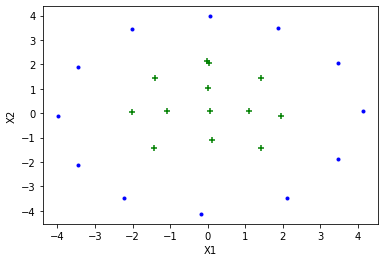

In [41]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'], df0['X2'], color='green', marker='+')
plt.scatter(df1['X1'], df1['X2'], color='blue', marker='.')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(['Y'], axis='columns')
Y = df.Y

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [45]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
model.fit(X_train, Y_train)

SVC()

In [46]:
#checking the accuracy
model.score(X_test, Y_test)

1.0

In [47]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


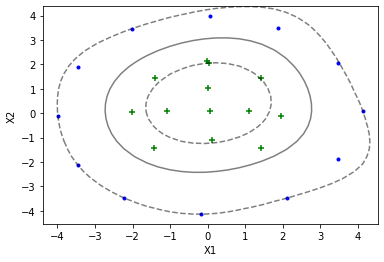

In [51]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(df0['X1'], df0['X2'], color='green', marker='+')
plt.scatter(df1['X1'], df1['X2'], color='blue', marker='.')
plot_svc_decision_function(model)